In [7]:
import numpy as np
import pandas as pd
from constants import *
from download import find_latest
from phe import load_population

In [8]:
rolling_days = 14
path, _ = find_latest('coronavirus-cases_*-*-*.csv', index=-1)

In [9]:
df = pd.read_csv(path)
df = df[df['Area type'].isin(ltla)][[code, specimen_date, cases]]
df_with_pop = pd.merge(df, load_population(), on=code)
df_with_pop['per100k'] = 100_000 * df_with_pop[cases] / df_with_pop['population']

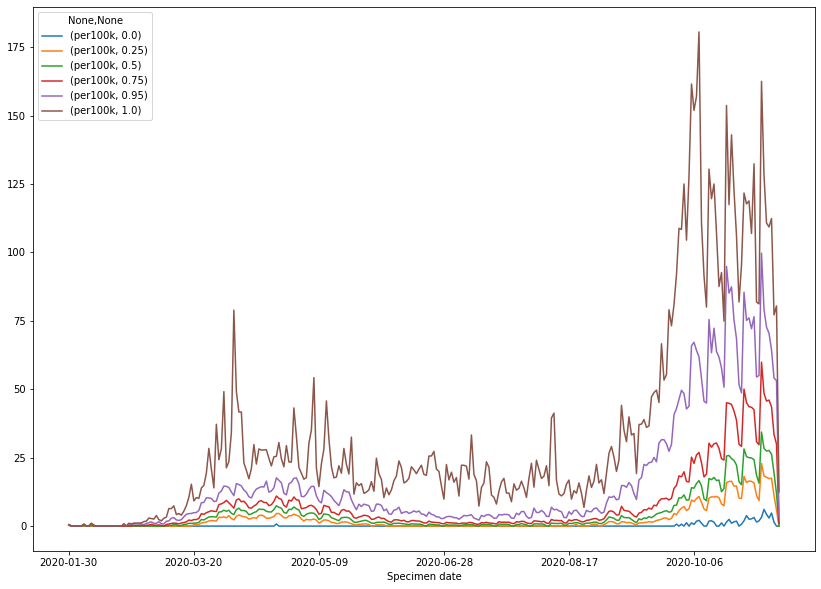

In [10]:
df_with_pop[[specimen_date, 'per100k']].groupby(specimen_date).quantile([0, 0.25, 0.5, 0.75, 0.95, 1]).unstack().plot(figsize=(14,10))

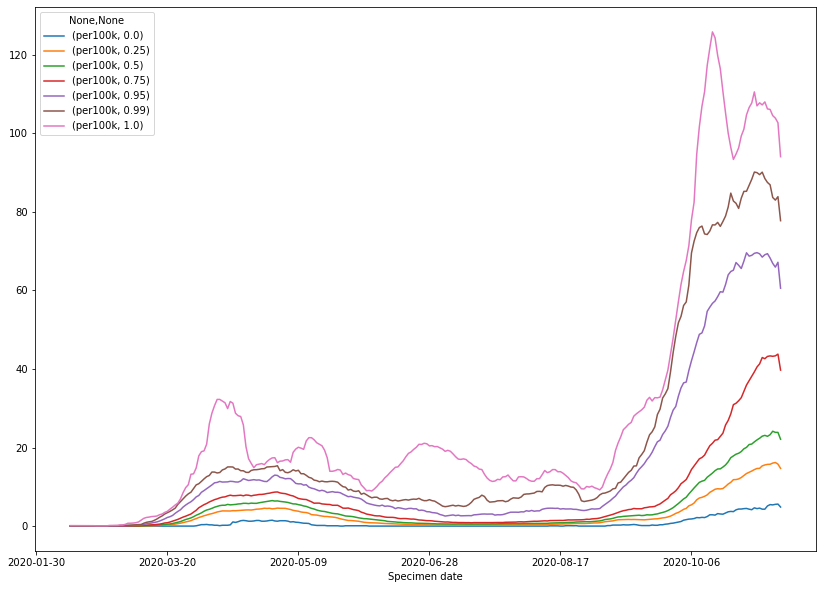

In [11]:
pivoted = df_with_pop.pivot_table(values='per100k', index=[specimen_date], columns=code)
smoothed = pivoted.fillna(0).rolling(rolling_days).mean().unstack().reset_index(name='per100k')
percentiles = smoothed[[specimen_date, 'per100k']].groupby(specimen_date).quantile([0, 0.25, 0.5, 0.75, 0.95, 0.99, 1]).unstack()
percentiles.plot(figsize=(14,10))